# Tutorial Pandas aplicado a datos de COVID-19

Pequeño tutorial muy básico sobre Pandas DataFrames, como cargar datos de un fichero CSV, algunas manipulaciones básicas y representación de los datos en forma de gráficas.

In [23]:
# Importar pandas y cualquier otra librería necesaria
import pandas as pd
import numpy as np
from scipy import interpolate
# Permite visualizar plots de matplotlib en el notebook
%matplotlib inline 

## Carga datos en DataFrames desde CSV
Este turorial se basa en algunos de los datos publicados en GitHub para la elaboración del [Coronavirus COVID-19 Global Cases by the Center for Systems Science and Engineering (CSSE)](https://coronavirus.jhu.edu/map.html) de la Universidad Johns Hopkins en USA.
Los datos están disponibles en [GitHub](https://urldefense.proofpoint.com/v2/url?u=https-3A__github.com_CSSEGISandData_2019-2DnCoV&d=DwMFaQ&c=n6-cguzQvX_tUIrZOS_4Og&r=ZNGvwmzlj8kMBY6JiOVCuA&m=I4tRzMk97krELxTlEBHo8DfBIHceLgA3njBSxpFaSkY&s=UBc1VDxKy4sUqMpr8gzpszg8V_iQ8FbOR-2YTsMe81E&e=).

Si los archivos en CSV dejaran de estar disponibles en repositorio de GitHub anterior, se incluyen algunos ficheros de ejemplo en este mismo repositorio.

In [24]:
global_confirmed_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
global_deaths_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
global_recovered_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# Descomente las siguientes líneas si hay problemas al cargar los datos del GitHub original en la siguiente celda 
#global_confirmed_url = 'https://github.com/mercaderd/python-notebooks/raw/master/covid_data_csv/time_series_covid19_confirmed_global.csv'
#global_deaths_url = 'https://github.com/mercaderd/python-notebooks/raw/master/covid_data_csv/time_series_covid19_deaths_global.csv'
#global_recovered_url = 'https://github.com/mercaderd/python-notebooks/raw/master/covid_data_csv/time_series_covid19_recovered_global.csv'

In [25]:
# Conversion necessaria para sustituir algunos valores en blanco de la comumna Province/State 
f = lambda x : 'Country' if x is '' else x 

# Carga de datos en 3 DataFrames distintos
global_confirmed  = pd.read_csv(global_confirmed_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                parse_dates = True,
                                converters = {'Province/State' : f})
global_deaths  = pd.read_csv(global_deaths_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                parse_dates = True,
                                converters = {'Province/State' : f})
global_recovered  = pd.read_csv(global_recovered_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                parse_dates = True,
                                converters = {'Province/State' : f})

In [26]:
# Se desechan algunas columnas innecesarias, se traspone el Dataframe (cambiar filas por columnas) 
# y se convierte el índice a formato datetime. Para los tres Dataframes cargados.
global_confirmed = global_confirmed.drop(columns=['Lat','Long']).T
global_confirmed.index = pd.to_datetime(global_confirmed.index)

global_deaths = global_deaths.drop(columns=['Lat','Long']).T
global_deaths.index = pd.to_datetime(global_deaths.index)

global_recovered = global_recovered.drop(columns=['Lat','Long']).T
global_recovered.index = pd.to_datetime(global_recovered.index)

Se puede visualizar uno de los Dataframes para comprobar cómo están organizados los datos. Para cada uno de los Dataframes los datos de cada país corresponden a una columna, y los datos por fechas se corresponden con las filas:

In [27]:
global_confirmed

Province/State     Country                                                     \
Country/Region Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
2020-01-22               0       0       0       0      0                   0   
2020-01-23               0       0       0       0      0                   0   
2020-01-24               0       0       0       0      0                   0   
2020-01-25               0       0       0       0      0                   0   
2020-01-26               0       0       0       0      0                   0   
2020-01-27               0       0       0       0      0                   0   
2020-01-28               0       0       0       0      0                   0   
2020-01-29               0       0       0       0      0                   0   
2020-01-30               0       0       0       0      0                   0   
2020-01-31               0       0       0       0      0                   0   
2020-02-01               0       0       0       0      0                   0   
2020-02-02               0       0       0       0      0                   0   
2020-02-03               0       0       0       0      0                   0   
2020-02-04               0       0       0       0      0                   0   
2020-02-05               0       0       0       0      0                   0   
2020-02-06               0       0       0       0      0                   0   
2020-02-07               0       0       0       0      0                   0   
2020-02-08               0       0       0       0      0                   0   
2020-02-09               0       0       0       0      0                   0   
2020-02-10               0       0       0       0      0                   0   
2020-02-11               0       0       0       0      0                   0   
2020-02-12               0       0       0       0      0                   0   
2020-02-13               0       0       0       0      0                   0   
2020-02-14               0       0       0       0      0                   0   
2020-02-15               0       0       0       0      0                   0   
2020-02-16               0       0       0       0      0                   0   
2020-02-17               0       0       0       0      0                   0   
2020-02-18               0       0       0       0      0                   0   
2020-02-19               0       0       0       0      0                   0   
2020-02-20               0       0       0       0      0                   0   
...                    ...     ...     ...     ...    ...                 ...   
2020-03-18              22      59      74      39      0                   1   
2020-03-19              22      64      87      53      0                   1   
2020-03-20              24      70      90      75      1                   1   
2020-03-21              24      76     139      88      2                   1   
2020-03-22              40      89     201     113      2                   1   
2020-03-23              40     104     230     133      3                   3   
2020-03-24              74     123     264     164      3                   3   
2020-03-25              84     146     302     188      3                   3   
2020-03-26              94     174     367     224      4                   7   
2020-03-27             110     186     409     267      4                   7   
2020-03-28             110     197     454     308      5                   7   
2020-03-29             120     212     511     334      7                   7   
2020-03-30             170     223     584     370      7                   7   
2020-03-31             174     243     716     376      7                   7   
2020-04-01             237     259     847     390      8                   7   
2020-04-02             273     277     986     428      8                   9   
2020-04-03             281     

In [28]:
global_confirmed['Country'][['France','Spain']]

Country/Region,France,Spain
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,2,0
2020-01-25,3,0
2020-01-26,3,0
2020-01-27,3,0
2020-01-28,4,0
2020-01-29,5,0
2020-01-30,5,0
2020-01-31,5,0


# Cargar datos con coordenadas GPS

Se cargan en otros Dataframes los datos a modo de cabecera, con las regiones y coordenadas GPS consideradas para todos los paises.

In [29]:
global_confirmed_GPS = pd.read_csv(global_confirmed_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                usecols = [0,1,2,3],
                                converters = {'Province/State' : f}).T
global_deaths_GPS = pd.read_csv(global_deaths_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                usecols = [0,1,2,3],
                                converters = {'Province/State' : f}).T
global_recovered_GPS = pd.read_csv(global_recovered_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                usecols = [0,1,2,3],
                                converters = {'Province/State' : f}).T

Estos headers se pueden utilizar a modo de directorio de posiciones. Podemos saber a qué pais corresponde una columna concreta, por ejemplo la 4:

In [30]:
global_confirmed_GPS

Province/State     Country                                      \
Country/Region Afghanistan  Albania  Algeria  Andorra   Angola   
Lat                   33.0  41.1533  28.0339  42.5063 -11.2027   
Long                  65.0  20.1683   1.6596   1.5218  17.8739   

Province/State                                         \
Country/Region Antigua and Barbuda Argentina  Armenia   
Lat                        17.0608  -38.4161  40.0691   
Long                      -61.7964  -63.6167  45.0382   

Province/State Australian Capital Territory New South Wales    ...      \
Country/Region                    Australia       Australia    ...       
Lat                                -35.4735        -33.8688    ...       
Long                               149.0124        151.2093    ...       

Province/State  Country              Bonaire, Sint Eustatius and Saba  \
Country/Region  Burundi Sierra Leone                      Netherlands   
Lat             -3.3731     8.460555                          12.1784   
Long            29.9189   -11.779889                         -68.2385   

Province/State    Country Falkland Islands (Malvinas)  \
Country/Region     Malawi              United Kingdom   
Lat            -13.254308                    -51.7963   
Long            34.301525                    -59.5236   

Province/State Saint Pierre and Miquelon     Country                 \
Country/Region                    France South Sudan Western Sahara   
Lat                              46.8852       6.877        24.2155   
Long                            -56.3159      31.307       -12.8858   

Province/State                                   
Country/Region Sao Tome and Principe      Yemen  
Lat                         0.186360  15.552727  
Long                        6.613081  48.516388  

[2 rows x 264 columns]

Extraer los datos de un pais:

In [31]:
global_confirmed['Country']['Germany']

2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
2020-01-27         1
2020-01-28         4
2020-01-29         4
2020-01-30         4
2020-01-31         5
2020-02-01         8
2020-02-02        10
2020-02-03        12
2020-02-04        12
2020-02-05        12
2020-02-06        12
2020-02-07        13
2020-02-08        13
2020-02-09        14
2020-02-10        14
2020-02-11        16
2020-02-12        16
2020-02-13        16
2020-02-14        16
2020-02-15        16
2020-02-16        16
2020-02-17        16
2020-02-18        16
2020-02-19        16
2020-02-20        16
               ...  
2020-03-18     12327
2020-03-19     15320
2020-03-20     19848
2020-03-21     22213
2020-03-22     24873
2020-03-23     29056
2020-03-24     32986
2020-03-25     37323
2020-03-26     43938
2020-03-27     50871
2020-03-28     57695
2020-03-29     62095
2020-03-30     66885
2020-03-31     71808
2020-04-01     77872
2020-04-02     84794
2020-04-03   

In [32]:
global_confirmed['Country'][['Spain', 'Germany']]

Country/Region,Spain,Germany
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
2020-01-27,0,1
2020-01-28,0,4
2020-01-29,0,4
2020-01-30,0,4
2020-01-31,0,5


Saber las provincias/stados o regiones consideradas para un pais:

In [33]:
global_confirmed.xs('France',axis=1,level = 1).columns

Index(['French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Country', 'Saint Pierre and Miquelon'],
      dtype='object', name='Province/State')

Extraer los datos de una región de un pais:

In [34]:
global_confirmed.tail()['Australian Capital Territory']['Australia']

2020-04-12    103
2020-04-13    102
2020-04-14    103
2020-04-15    103
2020-04-16    103
Name: Australia, dtype: int64

## Representando gráficamente los datos

La mejor forma para entender los datos es representarlos gráficamente.

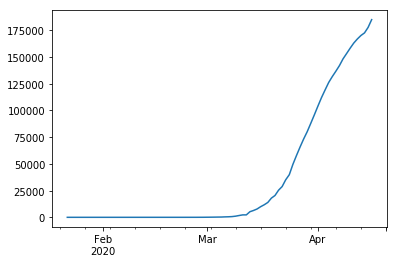

In [35]:
# Curva de evolución de contagiados en España
global_confirmed['Country']['Spain'].plot()

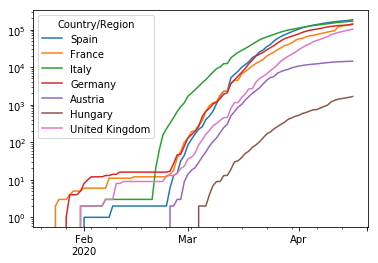

In [36]:
# Curva de contagiados en España, Francia
# Escala logarítimica en eje y
global_confirmed['Country'][['Spain','France', 'Italy', 'Germany', 'Austria', 'Hungary', 'United Kingdom']].plot(logy=True)

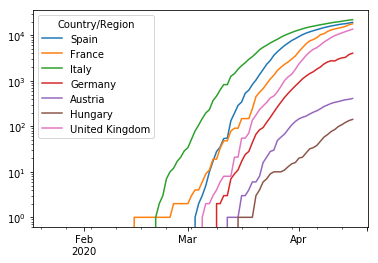

In [37]:
# Curva de fallecidos en España, Francia e Italia
# Escala logarítimica en eje y
global_deaths['Country'][['Spain','France', 'Italy', 'Germany', 'Austria', 'Hungary', 'United Kingdom']].plot(logy=True)

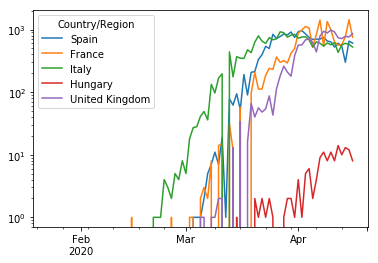

In [38]:
# Pero como lo importa es la velocidad, se pueden representar los datos como incrementos/diarios de fallecidos
global_deaths['Country'][['Spain','France', 'Italy', 'Hungary', 'United Kingdom']].diff(periods=1).plot(logy=True)

In [39]:
global_confirmed['Country','EU'] = global_confirmed['Country'][['Spain','France','Germany','Portugal',
                                                                'Austria','Belgium','Italy','Bulgaria','Croatia',
                                                               'Cyprus','Denmark','Estonia','Finland',
                                                               'Greece','Hungary','Ireland','Latvia',
                                                               'Lithuania','Luxembourg','Malta','Netherlands',
                                                               'Poland','Romania','Slovakia','Slovenia',
                                                               'Sweden','Czechia']].sum(axis=1)
global_deaths['Country','EU'] = global_deaths['Country'][['Spain','France','Germany','Portugal',
                                                                'Austria','Belgium','Italy','Bulgaria','Croatia',
                                                               'Cyprus','Denmark','Estonia','Finland',
                                                               'Greece','Hungary','Ireland','Latvia',
                                                               'Lithuania','Luxembourg','Malta','Netherlands',
                                                               'Poland','Romania','Slovakia','Slovenia',
                                                               'Sweden','Czechia']].sum(axis=1)


Se pueden crear nuevas series sumando las de otros paises. Por ejemplo, obtener los valores de la EU (TBC). También se puede usar la función sum() de un dataframe

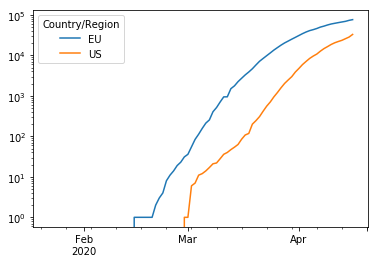

In [40]:
global_deaths['Country'][['EU','US']].plot(logy=True)

In [41]:
global_deaths['Country'][['EU','US']].to_csv('./covid_data_csv/deaths_data.csv')
global_confirmed['Country'][['EU','US']].to_csv('./covid_data_csv/confirmed_data.csv')

In [42]:
global_confirmed['Country'][['Spain','France', 'Italy', 'Germany', 'Austria', 'Hungary', 'United Kingdom']].to_csv('./covid_data_csv/confirmed_eu_data.csv')
global_deaths['Country'][['Spain','France', 'Italy', 'Germany', 'Austria', 'Hungary', 'United Kingdom']].to_csv('./covid_data_csv/deaths_eu_data.csv')

In [43]:
for s in global_confirmed['Country'][['EU','US']].columns:
    print(global_confirmed['Country'][[s]].values)

[[     0]
 [     0]
 [     2]
 [     3]
 [     3]
 [     4]
 [     8]
 [    10]
 [    10]
 [    14]
 [    19]
 [    21]
 [    23]
 [    24]
 [    24]
 [    24]
 [    26]
 [    31]
 [    33]
 [    33]
 [    35]
 [    35]
 [    35]
 [    35]
 [    36]
 [    36]
 [    36]
 [    36]
 [    36]
 [    36]
 [    53]
 [    95]
 [   188]
 [   262]
 [   365]
 [   523]
 [   777]
 [  1054]
 [  1403]
 [  2112]
 [  2602]
 [  3191]
 [  4049]
 [  5349]
 [  6933]
 [  8924]
 [ 11284]
 [ 13944]
 [ 16924]
 [ 21514]
 [ 22087]
 [ 34964]
 [ 42437]
 [ 49782]
 [ 59934]
 [ 69859]
 [ 82238]
 [ 99058]
 [116514]
 [135185]
 [152018]
 [174698]
 [195234]
 [221662]
 [252770]
 [283266]
 [315136]
 [340432]
 [366693]
 [396982]
 [426761]
 [455201]
 [485403]
 [512693]
 [534320]
 [555216]
 [577758]
 [603702]
 [629161]
 [655247]
 [677095]
 [720747]
 [738009]
 [755290]
 [776595]
 [809527]]
[[     1]
 [     1]
 [     2]
 [     2]
 [     5]
 [     5]
 [     5]
 [     5]
 [     5]
 [     7]
 [     8]
 [     8]
 [    11]
 [    11]

In [50]:
import os
import datetime
datetime.datetime.

datetime.datetime(2020, 4, 17, 19, 6, 48, 710732)

In [46]:
os.system('git add .')
os.system('git commit -m "updated data "')
os.system('git push origin master')

0